In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras


2023-05-16 22:48:57.659500: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def generate_time_series(batch_size,n_steps):
    freq1,freq2,offsets1,offsets2 = np.random.rand(4,batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5*np.sin((time - offsets1)*(freq1*10+10))
    series += 0.2*np.sin((time-offsets2)*(freq2*20+20))
    series += 0.1*(np.random.rand(batch_size,n_steps)-0.5)
    return series[...,np.newaxis].astype(np.float32)

np.random.seed(42)

n_steps = 50
series =  generate_time_series(10000,n_steps+1)
X_train,y_train = series[:7000,:n_steps],series[:7000,-1]
X_valid,y_valid = series[7000:9000,:n_steps],series[7000:9000,-1]
X_test,y_test = series[9000:,:n_steps],series[9000:,-1]
X_train.shape,y_train.shape

((7000, 50, 1), (7000, 1))

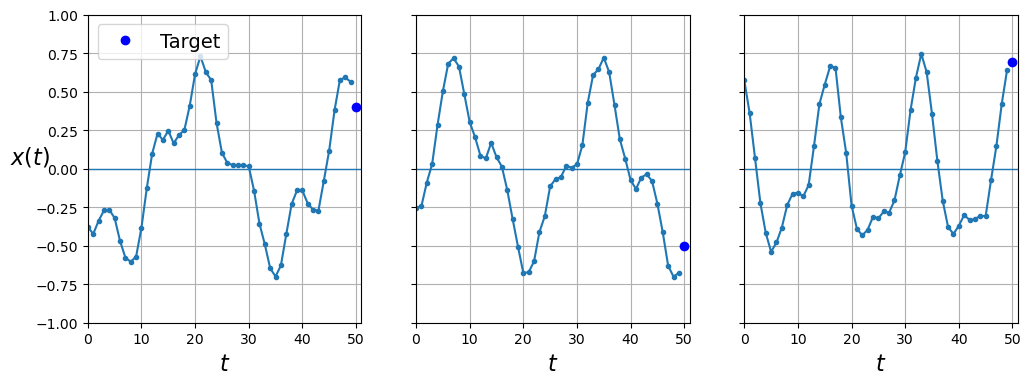

In [3]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
#save_fig("time_series_plot")
plt.show()

In [4]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])
model.compile(loss='mse',optimizer='adam')
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))

Epoch 1/20


2023-05-16 22:49:01.664866: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


219/219 [==============================] - 1s 2ms/step - loss: 0.1216 - val_loss: 0.0486
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0226
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0150
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0115
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0072
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 11/2

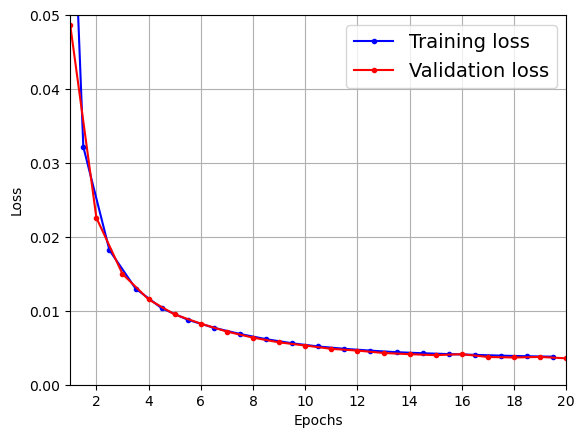

63/63 [==============================] - 0s 768us/step


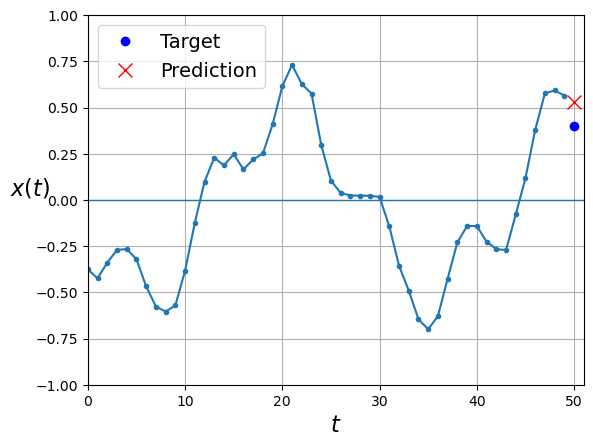

In [5]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [6]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0574 - val_loss: 0.0295
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0145
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0098
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0080
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0044

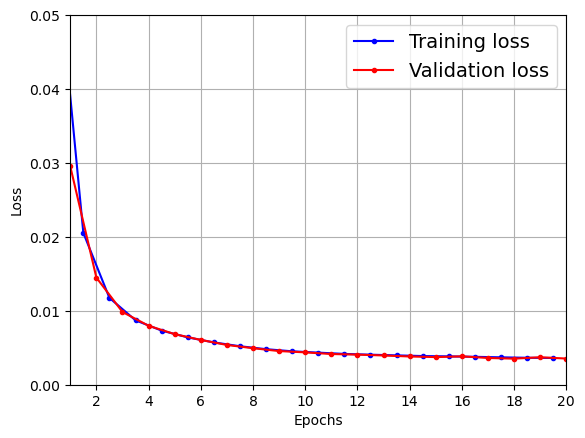

In [7]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [8]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1,input_shape=[None,1])
])
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse",optimizer=optimizer)
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0813 - val_loss: 0.0266
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0170 - val_loss: 0.0145
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0137 - val_loss: 0.0126
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 8/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0114 - val_loss: 0.0109

63/63 [==============================] - 0s 3ms/step - loss: 0.0109


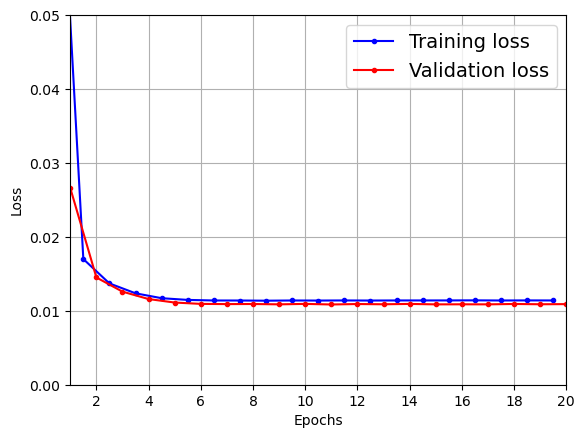

63/63 [==============================] - 0s 3ms/step


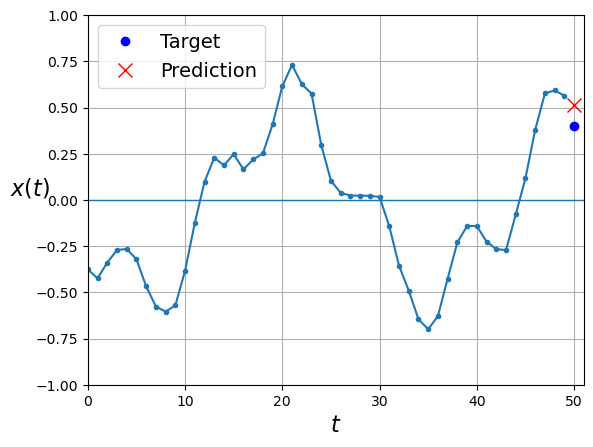

In [9]:
model.evaluate(X_valid, y_valid)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [10]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.SimpleRNN(1)])

model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))


Epoch 1/20
219/219 [==============================] - 9s 31ms/step - loss: 0.0332 - val_loss: 0.0076
Epoch 2/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 3/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 4/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 5/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 6/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 7/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 8/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 9/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0034 - val_lo

63/63 [==============================] - 1s 8ms/step - loss: 0.0029


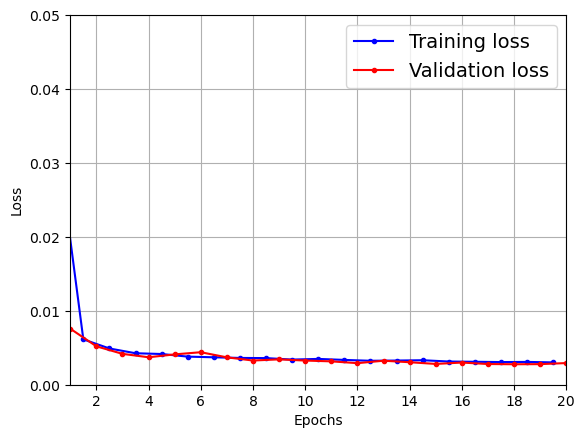

63/63 [==============================] - 1s 9ms/step


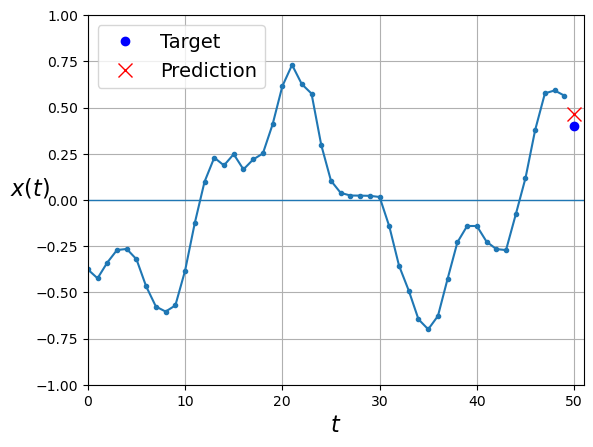

In [11]:
model.evaluate(X_valid, y_valid)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 6s 21ms/step - loss: 0.0267 - val_loss: 0.0051
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 5/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 6/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 7/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 8/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 9/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 10/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0029 - val_lo